# Application: Plastic wire coating data

## Background

:::{index} application wire coating
:::

In this lesson, we are going to look at over 2 million records containing data for the thickness of a PVC coating versus several processing parameters.  These records were taken over a 3 year period.  

<img src="../images/09_extrusion.png" alt="extrusion diagram" width="500px">

The basic operation of an coating extruder is shown above and details of the cooling pool is shown below.  Some of the machine parameters would be the wire coating speed (LineSpeed $m\ sec^{-1}$), temperature of the extruder (ExtrTemp $^{\circ} C$), temperature of the water in the cooling pool (WaterTemp $^{\circ} C$), date of the coating (Date) and perhaps the location of the machine (City).  Each of these variables will be included in our dataset along with the measured coating thickenss (Measure $\mu m$).  

<img src="../images/extrusion_coating_cooling.jpg" alt="extrusion coating cooling" width="300px">

:::{admonition} Learning Objectives  
Be able to:
* Read two text files containing 1 million points each and combine into a single dataframe 
* Perform all necessary cleaning, organizing, and sorting steps as needed  
* Perform corrections on data values when spelling variations exist for the same same record (e.g. city name) 
* Use conditionals to filter data when multiple conditions are required
* Display the data using matplotlib.pyplot
  
Date files needed: 
* First 1 million data records: [insulation1.csv](https://drive.google.com/uc?export=download&id=1bWIIA9ivM9SdZi6fzUItj8WM1tu_Tirz)
* Second 1 million data records: [insulation2.csv](https://drive.google.com/uc?export=download&id=1PZp0scqkttXh4LnPlWQ6izrX1bJmCLDM)  
:::

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read, Combine and Clean the Data

Let's read in the "insulation1.csv" data directly from the google drive it is stored. Every file in Drive has a unique identifyer that never changes.  If you hover over the links above or right click and select copy link you will see "https://drive.google.com/uc?export=download&id=1bWIIA9ivM9SdZi6fzUItj8WM1tu_Tirz".  The file identifyer is everything after  "id=" or in this case "1bWIIA9ivM9SdZi6fzUItj8WM1tu_Tirz".  Now that we have the identifyer we can use pandas to read the file.  

In [4]:
import warnings
warnings.filterwarnings("ignore")

:::{index} pandas read_csv, read_csv, warnings, quiet warnings
:::

In [7]:
raw=pd.read_csv('https://drive.google.com/uc?id=1bWIIA9ivM9SdZi6fzUItj8WM1tu_Tirz')
# if I had a second file to read I would look at use concat to combine the files
# example usage  new_df=pd.concat([df_1,df_2,df_3, etc...],ignore_index=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000003 entries, 0 to 1000002
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   ID         1000003 non-null  int64 
 1   Date       1000003 non-null  object
 2   Shifts     1000001 non-null  object
 3   ExtrTemp   1000003 non-null  object
 4   LineSpeed  1000003 non-null  object
 5   WaterTemp  1000003 non-null  object
 6   Measure    1000003 non-null  object
 7   City       1000003 non-null  object
dtypes: int64(1), object(7)
memory usage: 61.0+ MB


You probably got a DtypeWarning but the file was read correctly.  Just ignore that for now.  Several of the data columns have entries other than numbers (e.g. "\*") so the data type for that column is set to "object."  This is not memory efficient.  We will fix the data types now.  Let's see what we currently have.  

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000003 entries, 0 to 1000002
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   ID         1000003 non-null  int64 
 1   Date       1000003 non-null  object
 2   Shifts     1000001 non-null  object
 3   ExtrTemp   1000003 non-null  object
 4   LineSpeed  1000003 non-null  object
 5   WaterTemp  1000003 non-null  object
 6   Measure    1000003 non-null  object
 7   City       1000003 non-null  object
dtypes: int64(1), object(7)
memory usage: 61.0+ MB


So we have just over 1 million entries.  Dtype "object" means that the column contains at least some text values (or non-numeric values).  We don't want non-numeric values in Columns 3-6 so let's convert these columns `to_numeric` and replace all non-numeric values with `NaN` using the option `coerce`.  Likewise we will use `pd.to_datetime` to convert column 1.   

:::{index} to_numeric, to_datetime, pandas copy, pandas to_datetime, pandas to_numeric, pandas coerce, coerce
:::

In [67]:
df=raw.copy()
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['ExtrTemp'] = pd.to_numeric(df['ExtrTemp'], errors='coerce')
df['LineSpeed'] = pd.to_numeric(df['LineSpeed'], errors='coerce')
df['WaterTemp'] = pd.to_numeric(df['WaterTemp'], errors='coerce')
df['Measure'] = pd.to_numeric(df['Measure'], errors='coerce')
df.dtypes

ID                    int64
Date         datetime64[ns]
Shifts               object
ExtrTemp            float64
LineSpeed           float64
WaterTemp           float64
Measure             float64
City                 object
dtype: object

Notice that in column "Measure" the "\*" has been replaced with NaN.  

In [23]:
df.head()

,ID,Date,Shifts,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,1,2016-02-01,Shifts1,234.83,55.28,26.67,170.67,Kairo
1,2,2016-02-01,Shifts1,235.09,54.13,26.97,182.86,Kairo
2,3,2016-02-01,Shifts1,235.09,54.33,27.46,182.74,Kairo
3,4,2016-02-01,Shifts1,235.05,55.00,26.83,175.49,Kairo
4,5,2016-02-01,Shifts1,234.99,54.03,27.04,NaN,Kairo


We want a complete data set so let's drop all rows that contain 'NaN' in columns 3 - 6.  

In [68]:
df=df.dropna(axis='rows', how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 1000002
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ID         999995 non-null  int64         
 1   Date       999995 non-null  datetime64[ns]
 2   Shifts     999995 non-null  object        
 3   ExtrTemp   999995 non-null  float64       
 4   LineSpeed  999995 non-null  float64       
 5   WaterTemp  999995 non-null  float64       
 6   Measure    999995 non-null  float64       
 7   City       999995 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 68.7+ MB


After dropping rows with missing values we are left with 999,995 records.  

## Insulation thickness versus line speed

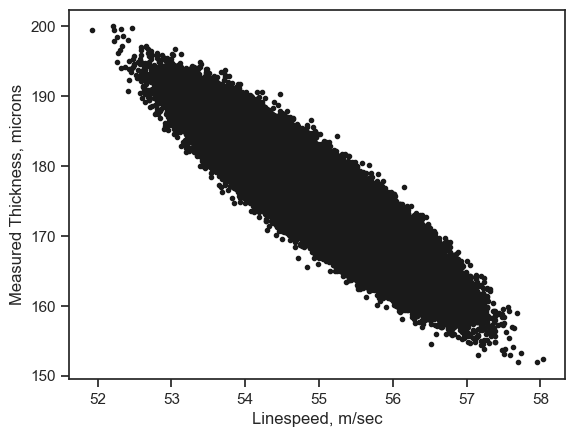

In [69]:
xdata=df.loc[:,'LineSpeed']
ydata=df.loc[:,'Measure']
plt.plot(xdata, ydata, 'k.')
plt.xlabel('Linespeed, m/sec')
plt.ylabel('Measured Thickness, microns')
plt.show()

### Filtering Data using Conditionals

:::{index} pandas conditionals, pandas filtering data, conditionals, unique, pandas replace, replace
:::

:::{note}
Let's talk about selecting subsets of the data for analysis or plotting etc.  You can setup as many conditions as you want and combine them as needed. It is important here to use parentheses for grouping our conditions together between the logical operators in this case '&'.  
  
Boolean operators we could use:  

'&' = and  
'|' = or  this is the pipe symbol above '\' on your keyboard  
'~' = not  
'>' = greater than  
'>=' = greater than or equal to  
'<'  = less than  
'<=' = less than or equal to  
'!=' not equal to  
'==' equal to  
:::


That is a lot of data.  What if we wanted to plot only the data from City Kairo and for the year 2016.  

In [70]:
#define our conditions in "()" 
cond1=(df['City']=="Kairo")
cond2=(df['Date']>'2016-01-01')
cond3=(df['Date']<'2016-12-31')

#use these to filter data with "&" = AND and "|" = OR
df_slice=df[cond1&cond2&cond3]
df_slice.head()

,ID,Date,Shifts,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,1,2016-02-01,Shifts1,234.83,55.28,26.67,170.67,Kairo
1,2,2016-02-01,Shifts1,235.09,54.13,26.97,182.86,Kairo
2,3,2016-02-01,Shifts1,235.09,54.33,27.46,182.74,Kairo
3,4,2016-02-01,Shifts1,235.05,55.00,26.83,175.49,Kairo
5,6,2016-02-01,Shifts2,235.04,55.26,26.62,172.80,Kairo


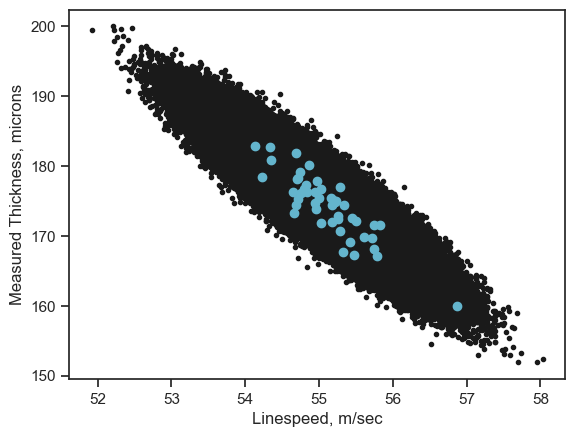

In [71]:
# all data
xdata=df.loc[:,'LineSpeed']
ydata=df.loc[:,'Measure']
plt.plot(xdata, ydata, 'k.')
# only 2016 data in Kairo
xdata=df_slice.loc[:,'LineSpeed']
ydata=df_slice.loc[:,'Measure']
plt.plot(xdata, ydata, 'co')

plt.xlabel('Linespeed, m/sec')
plt.ylabel('Measured Thickness, microns')
plt.show()

Let's take a look at what cities are included in our data.  We can use the `.unique()` function for this.  

In [72]:
df['City'].unique()

array(['Kairo', 'Cairo', 'CAI', 'Alexandria', 'Alex'], dtype=object)

Interesting...  so "Cairo" shows up as both "Kairo" and "CAI" while "Alexandria" shows also as "Alex"

We don't want multiple labels this way so lets make the following substitutions:  
`{'Kairo':'Cairo', 'CAI':'Cairo', 'Alex':'Alexandria'}`

In [73]:
df['City']=df['City'].replace({'Kairo':'Cairo', 'CAI':'Cairo'})
df['City'].unique()

array(['Cairo', 'Alexandria', 'Alex'], dtype=object)

We fixed the entries for Cairo.  We still have to fix those for Alexandria.  

In [74]:
df.head()

,ID,Date,Shifts,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,1,2016-02-01,Shifts1,234.83,55.28,26.67,170.67,Cairo
1,2,2016-02-01,Shifts1,235.09,54.13,26.97,182.86,Cairo
2,3,2016-02-01,Shifts1,235.09,54.33,27.46,182.74,Cairo
3,4,2016-02-01,Shifts1,235.05,55.00,26.83,175.49,Cairo
5,6,2016-02-01,Shifts2,235.04,55.26,26.62,172.80,Cairo


Here's an interesting case.  Say we want all cities except those labeled "Cairo"

In [76]:
#define our conditions in "()" 
cond1=(df['City']=="Cairo")

# use "~" before a condition to indicate the reverse of the condition or NOT cond1
df_slice=df[~cond1]
df_slice.head()

,ID,Date,Shifts,ExtrTemp,LineSpeed,WaterTemp,Measure,City
437,438,2016-03-01,Shifts1,235.04,54.36,26.88,180.33,Alexandria
438,439,2016-03-01,Shifts1,234.86,55.66,27.15,169.56,Alexandria
439,440,2016-03-01,Shifts1,234.75,56.11,27.23,165.24,Alexandria
440,441,2016-03-01,Shifts1,235.10,54.52,26.80,179.43,Alexandria
441,442,2016-03-01,Shifts1,235.08,55.13,26.88,175.01,Alexandria


In [78]:
#notice we filtered out "Cairo" with the above conditional
df_slice['City'].unique()

array(['Alexandria', 'Alex'], dtype=object)

:::{index} pandas value_counts, value_counts
:::

In [79]:
df['City'].value_counts() # unique values and number of times found in column

Alexandria    502458
Cairo         497293
Alex             244
Name: City, dtype: int64

## Exercises

:::{important}  
For all problems, use both the insulation1 and insulation2 datasets.  Combine these so that you have approximately 2 million data points.  For any problem below that uses a city name you should make sure you use all appropriate labels for that city.  That is, fix the city names as we did above in the lesson.  Use the `.unique()` function to make sure you fixed all the names.  
:::  

:::{hint}  
If things are running slow, I would make a separate dataframe with only a few 100 rows until your code works.  Then use the full dataframe.  Try something like:  
`ran_list=[np.random.randint(0,990000) for i in range(200)]`  
`df_short=df.loc[ran_list,:]`  
to make a short dataframe "df_short" with 200 rows randomly selected from a dataframe named "df"
:::

### Problem 1

Plot x='LineSpeed', y='Measure' for the following on one plot: 
* Alexandria in blue circles
* Cairo in red points
For the conditions:  
* 234.85 < ExtrTemp < 234.9 and 26.83 < WaterTemp < 26.9

### Problem 2

Plot the measured thickness 'Measure' vs the extruder temperature 'ExtrTemp' for 
1. Alexandria  as black small filled circles 'ko'
2. Cairo  as green small points 'g.'  

for:  55.0 < LineSpeed < 55.05 and 26.83 < WaterTemp < 26.9

### Problem 3

Plot the measured thickness 'Measure' vs the water temperature 'WaterTemp' for 
1. Alexandria  as blue small points 'b.'
2. Cairo  as red small points 'r.'  

for:  55.0 < LineSpeed < 55.05 and 234.85 < ExtrTemp < 234.9

### Problem 4

Plot the measured thickness 'Measure' vs the date 'Date' for

Alexandria as blue small points 'b.'
Cairo as red small points 'r.'
for:  

>    55.0 < LineSpeed < 55.05 and  
>    234.85 < ExtrTemp < 234.9 and  
>    26.83 < WaterTemp < 26.9


### Problem  5

Break up the data "Measure" into 20 groups based upon its value, i.e each group will have a size = ((max of Measure)-(min of Measure))/20.  For each group find the average of the "Measure" and average of the corresponding "LineSpeed".  You should have 20 pairs of points when you are done: (Measure, Linespeed).  Plot these values with Linespeed on the y-axis.  

There are many ways to think about doing this.  You could create another column in your dataframe called "group" and assign a group number from 1 to 20 for everypoint in your dataframe based on the value of "Measure".  Then you could use a groupby('group').mean() to find the mean of all points in each group.  

You could find all records within a given range of "Measure" values, find the mean of this group and append the value to an array.  Then iterate through all the ranges for a for loop.  

You could make a new column of data in your dataframe with values equal to pd.cut(df['Measure'],20), then consider what groupby could do...  

... and many other options.

